In [93]:
from quantrocket.master import list_calendar_statuses

In [94]:
list_calendar_statuses(exchanges="XNYS")

{'XNYS': {'status': 'closed',
  'since': '2024-03-15T16:00:00',
  'until': '2024-03-18T09:30:00',
  'timezone': 'America/New_York'}}

In [95]:
from quantrocket.license import set_license
set_license("bb7b93d0-de17-11ee-94b2-29a04fa1dd69")

{'licensekey': 'bb7b........dd69', 'software_license': {}}

In [96]:
from quantrocket.history import drop_db
drop_db("usstock-free-1d", confirm_by_typing_db_code_again="usstock-free-1d")

{'status': 'deleted quantrocket.v2.history.usstock-free-1d.sqlite'}

In [97]:
from quantrocket.master import delete_universe

# Delete the universe named "usstock-free"
delete_universe("usstock-free")

{'code': 'usstock-free', 'deleted': 1}

In [98]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

{'status': 'successfully created quantrocket.v2.history.usstock-free-1d.sqlite'}

In [99]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [100]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock",symbols=['AAPL'],sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT


In [101]:
print(securities.index.tolist())

['FIBBG000B9XRY4']


In [102]:
from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())

{'code': 'usstock-free', 'provided': 1, 'inserted': 1, 'total_after_insert': 1}

In [103]:
from quantrocket.master import get_securities

# Get the securities in the universe
universe_securities = get_securities(universes="usstock-free")

# Print the contents of the universe
print("Contents of universe 'usstock-free':")
print(universe_securities)

Contents of universe 'usstock-free':
               Symbol Exchange Country Currency SecType    Etf  \
Sid                                                              
FIBBG000B9XRY4   AAPL     XNAS      US      USD     STK  False   

                        Timezone       Name  PriceMagnifier  Multiplier  \
Sid                                                                       
FIBBG000B9XRY4  America/New_York  APPLE INC               1           1   

                Delisted DateDelisted LastTradeDate RolloverDate  
Sid                                                               
FIBBG000B9XRY4     False          NaT           NaT          NaT  


In [108]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="01-01-2023",end_date="31-12-2023", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616

In [109]:
prices.reset_index(inplace=True)

In [110]:
prices.rename_axis(None, axis=1, inplace=True)

In [111]:
prices['Daily_Return_PCT'] = prices['FIBBG000B9XRY4'].pct_change()

In [112]:
prices.tail(5)

,Field,Date,FIBBG000B9XRY4,Daily_Return_PCT
245,Close,2023-12-22,193.3533,-0.005547
246,Close,2023-12-26,192.8040,-0.002841
247,Close,2023-12-27,192.9038,0.000518
248,Close,2023-12-28,193.3333,0.002226
249,Close,2023-12-29,192.2846,-0.005424


In [128]:
states=[]
for i in prices['Daily_Return_PCT']:
      if i >= 0.01:          
            states.append('1')           
      elif i > -0.01:            
            states.append('0')           
      else:             
            states.append('-1')
print(states)

['-1', '1', '-1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '-1', '0', '0', '1', '1', '-1', '1', '-1', '0', '0', '1', '0', '1', '-1', '0', '-1', '0', '0', '-1', '0', '0', '-1', '0', '1', '1', '-1', '0', '-1', '-1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '-1', '0', '1', '0', '1', '0', '0', '-1', '0', '-1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '-1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '-1', '0', '0', '0', '0', '1', '0', '0', '-1', '0', '0', '0', '0', '0', '1', '0', '0', '-1', '0', '-1', '-1', '0', '0', '0', '0', '0', '-1', '0', '-1', '0', '0', '0', '1', '-1', '1', '0', '1', '1', '0', '0', '0', '-1', '-1', '0', '0', '-1', '-1', '0', '0', '1', '0', '-1', '0', '0', '0', '-1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',

In [129]:
import numpy as np
probs = np.array(states)

# Calculate probabilities
unique_elements, counts = np.unique(probs, return_counts=True)
probabilities = counts / len(probs)

# Print probabilities
print()
for element, prob in zip(unique_elements, probabilities):
    print(f"Probability of {element}: {prob:.2f}")


states_list = ['-1', '0', '1']

# Initialize transition count matrix
transition_counts = np.zeros((len(states_list), len(states_list)))

# Count transitions
for i in range(len(states) - 1):
    from_state = states_list.index(states[i])
    to_state = states_list.index(states[i + 1])
    transition_counts[from_state][to_state] += 1

# Calculate transition probabilities
initial_TPM = transition_counts / np.sum(transition_counts, axis=1, keepdims=True)

print("\n\nThe intial Transition Probability Matrix:")
print(initial_TPM)
TPM=initial_TPM


Probability of -1: 0.14
Probability of 0: 0.63
Probability of 1: 0.22


The intial Transition Probability Matrix:
[[0.13888889 0.72222222 0.13888889]
 [0.14649682 0.59872611 0.25477707]
 [0.125      0.67857143 0.19642857]]


<b>CALCULATING PORTFOLIO VALUE IF THE DECISION WAS TO BUY ON ALL 250 DAYS<b>

In [125]:
# Initialize portfolio value
V1 = 0

# Initialize list to store portfolio values
portfolio_values = []

# Iterate over the states and calculate portfolio value accordingly
for i in range(len(states) - 1):
    if states[i+1] == '1' and states[i] == '0':
        V1 += 1
    elif states[i+1] == '-1' and states[i] == '0':
        V1 -= 1
    # Append the portfolio value after each iteration
    portfolio_values.append(V1)

# Append the final portfolio value after all iterations
portfolio_values.append(V1)
print("PORTFOLIO VALUES IF WE DECIDE TO BUY ON EVERY DAY")
print(portfolio_values)

PORTFOLIO VALUES IF WE DECIDE TO BUY ON EVERY DAY
[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6, 7, 7, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 16, 16, 16, 16, 17, 17, 17, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 18, 18, 17, 17, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17]


In [126]:
import pandas as pd
import numpy as np
min_value = np.min(portfolio_values)
max_value = np.max(portfolio_values)
mean_value = np.mean(portfolio_values)
std_value = np.std(portfolio_values)

# Print the results
print("Minimum value:", min_value)
print("Maximum value:", max_value)
print("Mean value:", mean_value)
print("Standard deviation:", std_value)

Minimum value: 0
Maximum value: 18
Mean value: 10.964
Standard deviation: 4.950424628251601


<b>DYNAMIC PROGRAMMING APPROACH TO MAXIMIZE THE PORTFOLIO VALUE<b>

In [136]:
#Dynamic Programming Approach    
# Recurrence relation: PV = max(making a buying decision on d+1, deciding not to buy)
print("Transition probability matrix")
print(TPM)
buy_indices=[]
V = 0
states_list = ['-1', '0', '1']

# memoization array to store calculated portfolio values
memoization = np.zeros(250)

# Function to calculate portfolio value based on current state and decision to buy or not
def calculate_portfolio_value(current_state,previous_state,decision_to_buy,V):
    if decision_to_buy:
        
        if current_state == '1' and previous_state == '0':
            return V + 1
        elif current_state == '-1' and previous_state == '0':
            return V - 1
        else:
            return V
    else:
            return V
 
for i in range(249):  # Assuming 250 data points
    
    current_state = states[i+1]
    previous_state=states[i]      
    V=memoization[i]
    decision_to_buy = False       
    
    if TPM[states_list.index(current_state)][2] > TPM[states_list.index(current_state)][0]:     
            decision_to_buy = True
          
    
    # Calculate portfolio value based on current state and decision to buy
    V = calculate_portfolio_value(current_state,previous_state, decision_to_buy,V)
    
   
    # Update memoization array
    if memoization[i]>=V:
        memoization[i + 1]=memoization[i]
    else:
        memoization[i + 1] = V
        buy_indices.append(i+1)

Transition probability matrix
[[0.13888889 0.72222222 0.13888889]
 [0.14649682 0.59872611 0.25477707]
 [0.125      0.67857143 0.19642857]]


In [158]:
print(memoization)
min_value = np.min(memoization)
max_value = np.max(memoization)
mean_value = np.mean(memoization)
std_value = np.std(memoization)

# Print the results
print("\nMinimum value:", min_value)
print("Maximum value:", max_value)
print("Mean value:", mean_value)
print("Standard deviation:", std_value)

[ 0.  0.  0.  0.  0.  0.  1.  1.  2.  2.  2.  2.  3.  3.  3.  3.  4.  4.
  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  6.  6.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  8.  8.  8.  8.  8.  8.  8.  8.  8.  9.  9. 10. 10.
 10. 10. 10. 10. 10. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 14. 15. 15. 15. 16. 16.
 16. 16. 16. 16. 17. 17. 17. 17. 17. 17. 18. 18. 18. 19. 19. 19. 19. 19.
 20. 20. 21. 21. 21. 22. 22. 22. 22. 23. 23. 23. 24. 24. 24. 25. 25. 25.
 25. 25. 25. 25. 25. 25. 25. 26. 26. 26. 26. 26. 26. 26. 26. 26. 27. 27.
 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 27. 28. 28.
 28. 28. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 29. 30. 30. 30.
 30. 30. 30. 30. 30. 30. 30. 31. 31. 31. 31. 32. 32. 32. 32. 32. 32. 32.
 32. 32. 32. 32. 32. 32. 32. 32. 32. 33. 33. 34. 34. 34. 35. 35. 35. 35.
 36. 36. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 37. 38. 38.
 39. 39. 39. 39. 40. 40. 40. 40. 40. 40. 40. 40. 40

In [160]:
print("\nBUY INDICES\n")
print(buy_indices)


BUY INDICES

[6, 8, 12, 16, 21, 28, 30, 41, 50, 52, 59, 61, 69, 79, 85, 88, 94, 100, 103, 108, 110, 113, 117, 120, 123, 133, 142, 160, 164, 177, 187, 191, 207, 209, 212, 216, 218, 232, 234, 238]


In [142]:
Dates = prices.iloc[list(buy_indices)]

In [150]:
print("\nDAYS AT WHICH DECISION TO BUY COULD BE MADE\n")
print(Dates)
print("\n\n")


DAYS AT WHICH DECISION TO BUY COULD BE MADE

     Field       Date  FIBBG000B9XRY4  Daily_Return_PCT
6    Close 2023-01-11        132.5788          0.021112
8    Close 2023-01-13        133.8402          0.010119
12   Close 2023-01-20        136.9289          0.019220
16   Close 2023-01-26        142.9774          0.014804
21   Close 2023-02-02        149.7905          0.037062
28   Close 2023-02-13        153.0332          0.018807
30   Close 2023-02-15        154.5053          0.013903
41   Close 2023-03-03        150.2281          0.035090
50   Close 2023-03-16        155.0225          0.018694
52   Close 2023-03-20        156.5643          0.015484
59   Close 2023-03-29        159.9164          0.019790
61   Close 2023-03-31        164.0245          0.015644
69   Close 2023-04-13        164.6810          0.034104
79   Close 2023-04-27        167.5158          0.028395
85   Close 2023-05-05        172.6485          0.046927
88   Close 2023-05-10        172.6335          0.010392
94


**In the above dynamic programming approach:**

- **Initialization:** Initialize the portfolio value \( V \) to 0 and create a memoization NumPy array of zeroes to store calculated portfolio values.

- **Portfolio Value Calculation:** Calculate the portfolio value at each step based on the current state and the decision to buy or not, which is determined using the transition probability matrix.

- **Decision Making:** Determine whether to buy the stock on the next day based on the transition probability matrix. If the probability of transitioning to a bull state is higher than that of transitioning to a bear state, a decision to buy is made.

- **Memoization:** Store the calculated portfolio values in the memoization array, ensuring that only decisions resulting in the maximum value are retained.

- **Buy Indices:** Keep track of the indices where buying decisions are made to provide insights into the timing of portfolio adjustments.


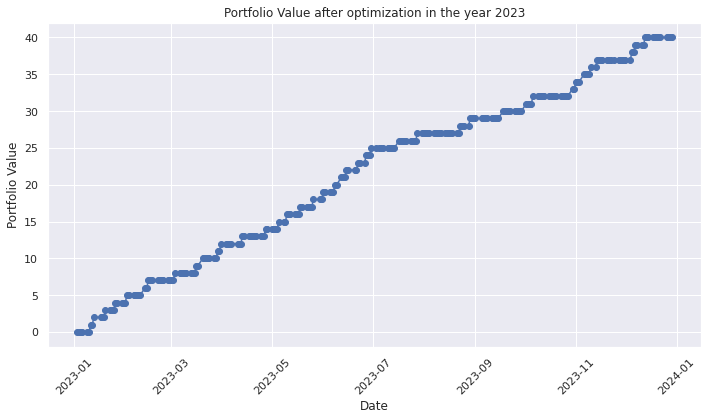

In [154]:
import matplotlib.pyplot as plt

# Assuming 'dates' is a column in the 'prices' DataFrame containing date information
X = prices['Date']

# Define the figure and axes
plt.figure(figsize=(10, 6))

# Plot memoization values against dates
plt.plot(X, memoization, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value after optimization in the year 2023')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




Comparison distribution of Portfolio values before and after optimization




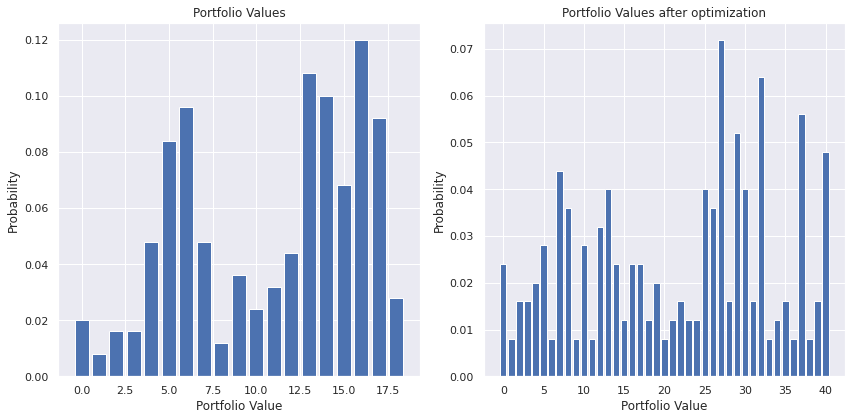

In [156]:
import matplotlib.pyplot as plt

print("\n\nComparison distribution of Portfolio values before and after optimization\n\n")
unique_values1, counts = np.unique(portfolio_values, return_counts=True)
total_observations1 = len(portfolio_values)
probabilities1 = counts / total_observations

 

unique_values2, counts = np.unique(memoization, return_counts=True)
total_observations2 = len(memoization)
probabilities2 = counts / total_observations

 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].bar(unique_values1, probabilities1)
axs[0].set_xlabel('Portfolio Value')
axs[0].set_ylabel('Probability')
axs[0].set_title('Portfolio Values')

axs[1].bar(unique_values2, probabilities2)
axs[1].set_xlabel('Portfolio Value')
axs[1].set_ylabel('Probability')
axs[1].set_title('Portfolio Values after optimization')
 
plt.tight_layout()
plt.show()
